https://www.kaggle.com/datasets/ananthr1/weather-prediction?resource=download

https://www.youtube.com/watch?v=99MN-rl8jGY


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [ ]:
data = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
pd.unique(data['weather'])

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
data.drop(['date'], inplace=True, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numerical_columns)

['weather']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

label_encoder = LabelEncoder()

for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, the non-numeric columns are encoded


In [ ]:
data.drop(data[~(data >= 0).all(axis=1)].index, inplace=True)

In [ ]:
data = data[(data >= 0).all(axis=1)]

In [ ]:
if np.any(data < 0):
    # Handle or remove negative values
    print("Negative values found in x_train.")

In [ ]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [ ]:
#splitting for train and test
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7298850574712644


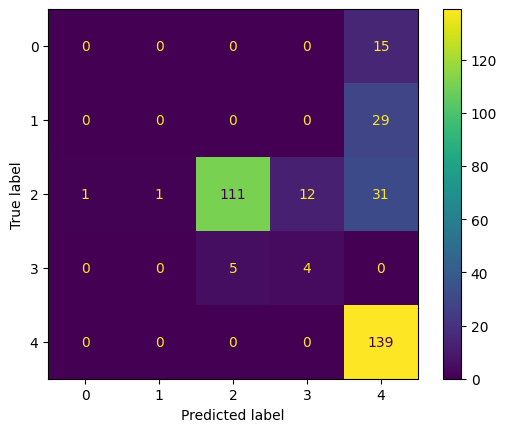

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        29
           2       0.96      0.71      0.82       156
           3       0.25      0.44      0.32         9
           4       0.65      1.00      0.79       139

    accuracy                           0.73       348
   macro avg       0.37      0.43      0.38       348
weighted avg       0.69      0.73      0.69       348



In [ ]:
# Fitting Naive Bayes to the Training set
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
